In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
from time import sleep

[nltk_data] Downloading package stopwords to /Users/neha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/neha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
all_jobs = pd.read_csv('indeed-jobs.csv')
all_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        78 non-null     int64  
 1   Job title         78 non-null     object 
 2   Company name      78 non-null     object 
 3   Company rating    49 non-null     float64
 4   Company location  78 non-null     object 
 5   is_remote         50 non-null     object 
 6   Salary range      19 non-null     object 
 7   Job summary       78 non-null     object 
 8   url               78 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 5.6+ KB


In [3]:
all_jobs.head(5)

,Unnamed: 0,Job title,Company name,Company rating,Company location,is_remote,Salary range,Job summary,url
0,0,Data Scientist,Advance Local,3.7,Remote,NaN,"$80,751 - $186,160 a year","Experience using statistics, propensity model ...",/pagead/clk?mo=r&ad=-6NYlbfkN0CcpDw2n5tFowY4D2...
1,1,Data Scientist,Vaco,3.7,"Nashville, TN",Remote,"$130,000 a year",The role will work with other Data Scientists ...,/pagead/clk?mo=r&ad=-6NYlbfkN0D_sybMACCpf9B-67...
2,2,Data Scientist,Synergy Systems,4.2,Remote,NaN,"$90,000 - $140,000 a year","Proficiency in Python, SQL, git and common dat...",/company/Synergy-Systems/jobs/Data-Scientist-5...
3,3,Data Scientist,myAgro Farms,NaN,Remote,NaN,NaN,Data analytics: Uncover trends and patterns be...,/rc/clk?jk=6987fce923c8bad3&fccid=425868045ef0...
4,4,Associate Data Scientist,"Press Ganey Associates, Inc.",3.1,Remote,NaN,NaN,"Stay abreast of contemporary analytics, such a...",/rc/clk?jk=30fc6511270c5792&fccid=381fad78e933...


In [4]:
all_jobs.duplicated().value_counts()

False    78
dtype: int64

In [5]:
all_jobs['url'].iloc[0]

'/pagead/clk?mo=r&ad=-6NYlbfkN0CcpDw2n5tFowY4D2cjyZjiiIvlGw-IbpEED90VPq7RO-x9QW_g4KApdr9zUuabeOpTyafs8_O_Wjl48rNmF3r4sX9iIikcafjqdNoY9LfSy2V29uoYmLHxMPTmLHjyUGQRf80T005BOK8EhOTv1BcjEh5nuYfG9Qow-8C5XAkgmoT83k34KXZ-V1nUpwpjfF-OgsUezu7Un3XeesiP7zRWGlSJFTr0F2ccMmIJpHvgjgQWXJrrZx9eRkw3pQpl8X0MmZ2JYJhFXhLO-vjSc73AozdseehAEAWVJK8A0WBb8i1MqJF_204d4rW09bfVyIRDZKRJkA_IohTTFlFHEYnW1dvh8DnBYunxGHJ2y7el1OIUw4lN01Ol-EtmguW0moQ1xJNGAUbNhqMkuXtdBYjrjMdHcaoFyjAKWe0tdQ_6mJlFEqB-laA6nNOxr1hk73s=&p=0&fvj=1&vjs=3'

In [6]:
all_jobs['new_url'] = 'http://www.indeed.com' + all_jobs['url']

In [7]:
all_jobs['new_url'].iloc[2]

'http://www.indeed.com/company/Synergy-Systems/jobs/Data-Scientist-5db30ef9dc62167c?fccid=e143f1b08f6269c3&vjs=3'

In [8]:
page_html = requests.get(all_jobs['new_url'].iloc[2])
page_html.status_code

200

In [9]:
page = BeautifulSoup(page_html.content, 'html.parser')
page.prettify()[:500]

'<!DOCTYPE html>\n<html dir="ltr" lang="en">\n <head>\n  <title>\n   Data Scientist - Remote - Indeed.com\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="ie=edge" http-equiv="x-ua-compatible"/>\n  <meta content="notranslate" name="google"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="noindex" name="robots"/>\n  <meta content="https://www.indeed.com/viewjob?from=appsharedroid&amp;jk=5db30ef9dc62167c" id="indeed-share-url"/>\n  <meta content="Data Scienti'

In [10]:
job_description = page.find_all(['p','li'])
job_description_no_tags = [j.text for j in job_description]


In [11]:
full_description = ' '.join(job_description_no_tags)
full_description

'Data Scientist Position Summary The Data Scientist applies machine learning and statistical techniques. The Data Scientist will be responsible for exploring and creating compelling visualizations of new datasets, identify key features and engineer new ones to be used in modeling, and discover the modeling approaches that deliver the best results based on appropriate evaluation metrics. Essential Responsibilities Collaborate with teams across the business to translate their needs or challenges into machine learning or statistical problems Support the development of data products through exploratory data analysis, feature engineering and model building Effectively communicate experiments, models and analytics outputs with partners Other duties as assigned Minimum Experience and Qualifications Bachelor’s Degree in computer science or a quantitative discipline Two (2) to Three (3) year of relevant industry experience Proficiency in Python, SQL, git and common data science and machine lear

In [12]:
#Step 1 - tokenize

token_description = nltk.word_tokenize(full_description.lower())
token_description

['data',
 'scientist',
 'position',
 'summary',
 'the',
 'data',
 'scientist',
 'applies',
 'machine',
 'learning',
 'and',
 'statistical',
 'techniques',
 '.',
 'the',
 'data',
 'scientist',
 'will',
 'be',
 'responsible',
 'for',
 'exploring',
 'and',
 'creating',
 'compelling',
 'visualizations',
 'of',
 'new',
 'datasets',
 ',',
 'identify',
 'key',
 'features',
 'and',
 'engineer',
 'new',
 'ones',
 'to',
 'be',
 'used',
 'in',
 'modeling',
 ',',
 'and',
 'discover',
 'the',
 'modeling',
 'approaches',
 'that',
 'deliver',
 'the',
 'best',
 'results',
 'based',
 'on',
 'appropriate',
 'evaluation',
 'metrics',
 '.',
 'essential',
 'responsibilities',
 'collaborate',
 'with',
 'teams',
 'across',
 'the',
 'business',
 'to',
 'translate',
 'their',
 'needs',
 'or',
 'challenges',
 'into',
 'machine',
 'learning',
 'or',
 'statistical',
 'problems',
 'support',
 'the',
 'development',
 'of',
 'data',
 'products',
 'through',
 'exploratory',
 'data',
 'analysis',
 ',',
 'feature',
 'e

In [13]:
#Step 2 - remove punctuations and stopwords
#del(cleaned_description)
cleaned_description = [word for word in token_description if word.isalnum()]
cleaned_description = [word for word in cleaned_description if word not in stopwords.words('english')]
cleaned_description

['data',
 'scientist',
 'position',
 'summary',
 'data',
 'scientist',
 'applies',
 'machine',
 'learning',
 'statistical',
 'techniques',
 'data',
 'scientist',
 'responsible',
 'exploring',
 'creating',
 'compelling',
 'visualizations',
 'new',
 'datasets',
 'identify',
 'key',
 'features',
 'engineer',
 'new',
 'ones',
 'used',
 'modeling',
 'discover',
 'modeling',
 'approaches',
 'deliver',
 'best',
 'results',
 'based',
 'appropriate',
 'evaluation',
 'metrics',
 'essential',
 'responsibilities',
 'collaborate',
 'teams',
 'across',
 'business',
 'translate',
 'needs',
 'challenges',
 'machine',
 'learning',
 'statistical',
 'problems',
 'support',
 'development',
 'data',
 'products',
 'exploratory',
 'data',
 'analysis',
 'feature',
 'engineering',
 'model',
 'building',
 'effectively',
 'communicate',
 'experiments',
 'models',
 'analytics',
 'outputs',
 'partners',
 'duties',
 'assigned',
 'minimum',
 'experience',
 'qualifications',
 'bachelor',
 'degree',
 'computer',
 'sci

In [14]:
temp = 'hello, this is 345 or 4 fo5ur'

re.sub('[\d*]', '', temp)

'hello, this is  or  four'

In [15]:
#remove numbers
cleaned_description = [re.sub('[\d*]', '', word) for word in cleaned_description]
cleaned_description = [word for word in cleaned_description if word.isalnum()]  #this removes the space left after substituting numbers
cleaned_description

['data',
 'scientist',
 'position',
 'summary',
 'data',
 'scientist',
 'applies',
 'machine',
 'learning',
 'statistical',
 'techniques',
 'data',
 'scientist',
 'responsible',
 'exploring',
 'creating',
 'compelling',
 'visualizations',
 'new',
 'datasets',
 'identify',
 'key',
 'features',
 'engineer',
 'new',
 'ones',
 'used',
 'modeling',
 'discover',
 'modeling',
 'approaches',
 'deliver',
 'best',
 'results',
 'based',
 'appropriate',
 'evaluation',
 'metrics',
 'essential',
 'responsibilities',
 'collaborate',
 'teams',
 'across',
 'business',
 'translate',
 'needs',
 'challenges',
 'machine',
 'learning',
 'statistical',
 'problems',
 'support',
 'development',
 'data',
 'products',
 'exploratory',
 'data',
 'analysis',
 'feature',
 'engineering',
 'model',
 'building',
 'effectively',
 'communicate',
 'experiments',
 'models',
 'analytics',
 'outputs',
 'partners',
 'duties',
 'assigned',
 'minimum',
 'experience',
 'qualifications',
 'bachelor',
 'degree',
 'computer',
 'sci

In [16]:
Counter(cleaned_description).most_common

<bound method Counter.most_common of Counter({'data': 7, 'experience': 6, 'learning': 5, 'machine': 4, 'science': 4, 'scientist': 3, 'analysis': 3, 'indeed': 3, 'statistical': 2, 'techniques': 2, 'new': 2, 'modeling': 2, 'best': 2, 'engineering': 2, 'building': 2, 'communicate': 2, 'models': 2, 'qualifications': 2, 'degree': 2, 'computer': 2, 'quantitative': 2, 'discipline': 2, 'year': 2, 'testing': 2, 'browse': 2, 'center': 2, 'privacy': 2, 'position': 1, 'summary': 1, 'applies': 1, 'responsible': 1, 'exploring': 1, 'creating': 1, 'compelling': 1, 'visualizations': 1, 'datasets': 1, 'identify': 1, 'key': 1, 'features': 1, 'engineer': 1, 'ones': 1, 'used': 1, 'discover': 1, 'approaches': 1, 'deliver': 1, 'results': 1, 'based': 1, 'appropriate': 1, 'evaluation': 1, 'metrics': 1, 'essential': 1, 'responsibilities': 1, 'collaborate': 1, 'teams': 1, 'across': 1, 'business': 1, 'translate': 1, 'needs': 1, 'challenges': 1, 'problems': 1, 'support': 1, 'development': 1, 'products': 1, 'explor

In [17]:
from nltk.util import ngrams

twogram_description = list(ngrams(cleaned_description, 2))

In [18]:
twogram_description = [" ".join(word) for word in twogram_description]

In [19]:
Counter(twogram_description).most_common

<bound method Counter.most_common of Counter({'machine learning': 4, 'data scientist': 3, 'learning statistical': 2, 'experience qualifications': 2, 'degree computer': 2, 'computer science': 2, 'science quantitative': 2, 'quantitative discipline': 2, 'data science': 2, 'scientist position': 1, 'position summary': 1, 'summary data': 1, 'scientist applies': 1, 'applies machine': 1, 'statistical techniques': 1, 'techniques data': 1, 'scientist responsible': 1, 'responsible exploring': 1, 'exploring creating': 1, 'creating compelling': 1, 'compelling visualizations': 1, 'visualizations new': 1, 'new datasets': 1, 'datasets identify': 1, 'identify key': 1, 'key features': 1, 'features engineer': 1, 'engineer new': 1, 'new ones': 1, 'ones used': 1, 'used modeling': 1, 'modeling discover': 1, 'discover modeling': 1, 'modeling approaches': 1, 'approaches deliver': 1, 'deliver best': 1, 'best results': 1, 'results based': 1, 'based appropriate': 1, 'appropriate evaluation': 1, 'evaluation metri

lets put this together in a function that takes the url as the input and outputs the 1 & 2 word tokens and the number of time they appear in the description.
1 - check if the url is still valid, if not exit the function

In [20]:
all_one_tokens = []
all_two_tokens = []

In [21]:
def job_skills(url):
    try:
        sleep(5)  #to avoid bombarding the website with continuous requests
        response = requests.get(url)
        if not response:
            print('connection was not successful')
            return
        print(response.status_code)
        page_html = BeautifulSoup(response.content, 'html.parser')
        page = page_html.find_all(['p','li'])
        job_description = [j.text for j in page]
        job_description = ' '.join(job_description)
        #print(job_description)
        
        tokens = nltk.word_tokenize(job_description.lower())
        cleaned_tokens = [word for word in tokens if word not in stopwords.words('english')]
        cleaned_tokens = [re.sub('[\d*]', '', word) for word in cleaned_tokens] #remove numbers
        one_token = [word for word in cleaned_tokens if word.isalnum()] #remove punctuation and empty space
        #print(one_token)
        #two_tokens = list(ngrams(one_token, 2))
        #two_tokens = [" ".join(word) for word in two_tokens]
        return one_token
    except requests.exceptions.MissingSchema as noschema:
        print(noschema)
        return

#one_token, two_tokens = job_skills('http://www.indeed.com/company/Synergy-Systems/jobs/Data-Scientist-5db30ef9dc62167c?fccid=e143f1b08f6269c3&vjs=3')

this function will be called for each row's url and the tokens will be saved in seperate lists

In [23]:
all_jobs['token_desc'] = all_jobs['new_url'].apply(job_skills)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [24]:
all_jobs.head()

,Unnamed: 0,Job title,Company name,Company rating,Company location,is_remote,Salary range,Job summary,url,new_url,token_desc
0,0,Data Scientist,Advance Local,3.7,Remote,NaN,"$80,751 - $186,160 a year","Experience using statistics, propensity model ...",/pagead/clk?mo=r&ad=-6NYlbfkN0CcpDw2n5tFowY4D2...,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"[advance, local, searching, data, scientist, a..."
1,1,Data Scientist,Vaco,3.7,"Nashville, TN",Remote,"$130,000 a year",The role will work with other Data Scientists ...,/pagead/clk?mo=r&ad=-6NYlbfkN0D_sybMACCpf9B-67...,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"[hiring, lab, career, advice, browse, jobs, br..."
2,2,Data Scientist,Synergy Systems,4.2,Remote,NaN,"$90,000 - $140,000 a year","Proficiency in Python, SQL, git and common dat...",/company/Synergy-Systems/jobs/Data-Scientist-5...,http://www.indeed.com/company/Synergy-Systems/...,"[data, scientist, position, summary, data, sci..."
3,3,Data Scientist,myAgro Farms,NaN,Remote,NaN,NaN,Data analytics: Uncover trends and patterns be...,/rc/clk?jk=6987fce923c8bad3&fccid=425868045ef0...,http://www.indeed.com/rc/clk?jk=6987fce923c8ba...,"[department, product, technology, team, data, ..."
4,4,Associate Data Scientist,"Press Ganey Associates, Inc.",3.1,Remote,NaN,NaN,"Stay abreast of contemporary analytics, such a...",/rc/clk?jk=30fc6511270c5792&fccid=381fad78e933...,http://www.indeed.com/rc/clk?jk=30fc6511270c57...,"[press, ganey, press, ganey, pioneered, health..."


In [25]:
set(all_jobs['token_desc'].loc[10])

{'ability',
 'act',
 'advice',
 'affecting',
 'analytics',
 'analyze',
 'applications',
 'apply',
 'approaches',
 'appropriateness',
 'aptitude',
 'assess',
 'bachelor',
 'browse',
 'career',
 'center',
 'certifications',
 'client',
 'collaborate',
 'companies',
 'compelling',
 'competing',
 'completeness',
 'complex',
 'computer',
 'conduct',
 'consultant',
 'control',
 'cookies',
 'countries',
 'coursework',
 'create',
 'critical',
 'data',
 'databases',
 'datasets',
 'degree',
 'design',
 'designers',
 'details',
 'develop',
 'developers',
 'development',
 'dhs',
 'discipline',
 'disparate',
 'diverse',
 'documentation',
 'domain',
 'dynamic',
 'econometrics',
 'engineering',
 'environment',
 'events',
 'excitement',
 'experience',
 'exploratory',
 'extensive',
 'familiarity',
 'fast',
 'find',
 'given',
 'harmonize',
 'help',
 'hiring',
 'indeed',
 'information',
 'insights',
 'integrate',
 'intuitive',
 'jobs',
 'junior',
 'lab',
 'language',
 'languages',
 'lead',
 'leadership',


In [26]:
all_descriptions = Counter()

#all_descriptions.update(token) for token in all_jobs['token_desc']

all_jobs['token_desc'].apply(lambda tokens: all_descriptions.update(set(tokens)))

0     None
1     None
2     None
3     None
4     None
      ... 
73    None
74    None
75    None
76    None
77    None
Name: token_desc, Length: 78, dtype: object

In [42]:
all_jobs.head()

all_jobs.to_csv('indeed-jobs-1.csv')

In [28]:
all_jobs['two_tokens'] = all_jobs['token_desc'].apply(lambda x: list(ngrams(x, 2)))
def convert_to_string(two_tokens):
    return([" ".join(word) for word in two_tokens])
all_jobs['two_tokens'] = all_jobs['two_tokens'].apply(convert_to_string)

In [29]:
all_jobs['two_tokens'].apply(lambda tokens: all_descriptions.update(set(tokens)))

0     None
1     None
2     None
3     None
4     None
      ... 
73    None
74    None
75    None
76    None
77    None
Name: two_tokens, Length: 78, dtype: object

In [43]:
all_descriptions['b']

2

lets build a dictionary of most common languages and skills that are required when applying for a data scientist job.

Statistics, Data Mining, Machine Learning Techniques, SQL, Data mining Frameworks, R, Engineering, Programming, Algorithms, Data Science, Product Development, Operations Research, Business Intelligence, Data Visualization, Business Intelligence Tools, Data Sources, Intelligence, JAVA, Scala, Unstructured Data, BSC, Tableau, Hadoop, Analytical Mind, Business Acumen, Computer Science, Python, Data Products, Visualization, Query, Recommendation, Fraud, Fraud Detection, Classifiers, Ad-Hoc, Third Party, Data Collection, Anomaly Detection, WEKA, Numpy, Matlab, Visualisation, D3.Js, HIVE, Ensemble, Nosql, Databases, Mongodb, Hbase, Currently Scripting, Programming Languages, Primary Focus, Business Insights, Highly Analytical, Interpreting Data

In [44]:
langs_tools_dict = {
    'Python': all_descriptions['python'],
    'R': all_descriptions['r'],
    'SQL': all_descriptions['sql'],
    'NoSQL': all_descriptions['nosql'],
    'Mongodb': all_descriptions['mongodb'],
    'Java': all_descriptions['java'] + all_descriptions['javascript'],
    'Matlab': all_descriptions['matlab'],
    'Excel': all_descriptions['excel'],
    'Tableau': all_descriptions['tableau'],
    'SAS': all_descriptions['sas'],
    'SPSS': all_descriptions['spss'],
    'Hadoop': all_descriptions['hadoop'],
    'PySpark': all_descriptions['pyspark'] + all_descriptions['spark'],
    'Scala': all_descriptions['scala'],
    'AWS': all_descriptions['aws'],
    'Azure': all_descriptions['azure'],
    'Github': all_descriptions['github']
    }

techskills_dict = {
    'AI': all_descriptions['ai'] + all_descriptions['artificial intelligence'],
    'algorithms': all_descriptions['algorithms'] + all_descriptions['algorithm'],
    'business intelligence': all_descriptions['business intelligence'] + all_descriptions['bi'],
    'computer science': all_descriptions['computer science'],
    'engineering': all_descriptions['engineering'],
    'machine learning': all_descriptions['machine learning'],
    'deep learning': all_descriptions['deep learning'],
    'regression': all_descriptions['regression'],
    'classification': all_descriptions['classification'],
    'data visualization': all_descriptions['data visualization'] + all_descriptions['data visualizations'],
    'statistics': all_descriptions['statistics'],
    'database management': all_descriptions['database management'],
    'database': all_descriptions['database'] + all_descriptions['databases'],
    'big data': all_descriptions['big data'],
    'modeling': all_descriptions['modeling'],
    'mining': all_descriptions['mining'],
    'NLP': all_descriptions['nlp']
    
}

soft_skills = {
    'communication': all_descriptions['communication'],
    'presentation': all_descriptions['presentation'],
    'reporting': all_descriptions['reporting'],
    'research': all_descriptions['research'],
    'critical thinking': all_descriptions['critical thinking'],
    'analytical': all_descriptions['analytical']    
}

In [45]:
all_dicts = langs_tools_dict 
all_dicts.update(techskills_dict)
all_dicts.update(soft_skills)

In [46]:
final_df = pd.DataFrame(all_dicts.items(), columns=['keyword', 'count'])
final_df['count'] = (final_df['count']/len(all_jobs))*100

In [48]:
final_df.head()

,keyword,count
0,Python,60.256410
1,R,35.897436
2,SQL,34.615385
3,NoSQL,1.282051
4,Mongodb,0.000000


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='keyword'>

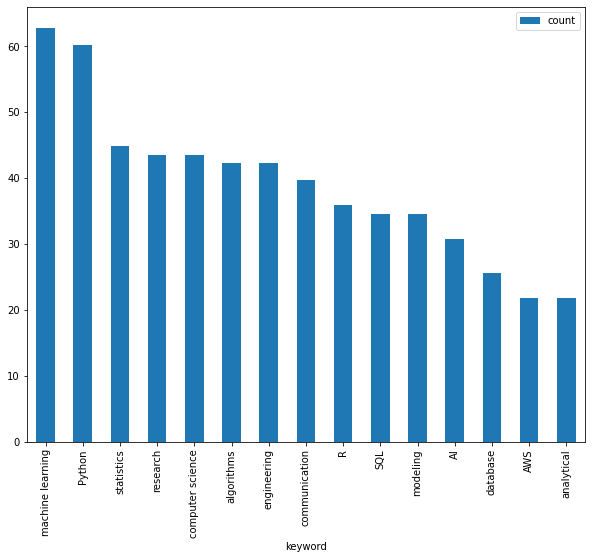

In [75]:
#fig = plt.figure(figsize = (15,12))
final_df.sort_values(by = 'count', ascending=False).head(15).plot(x='keyword', kind='bar', figsize=(10,8))

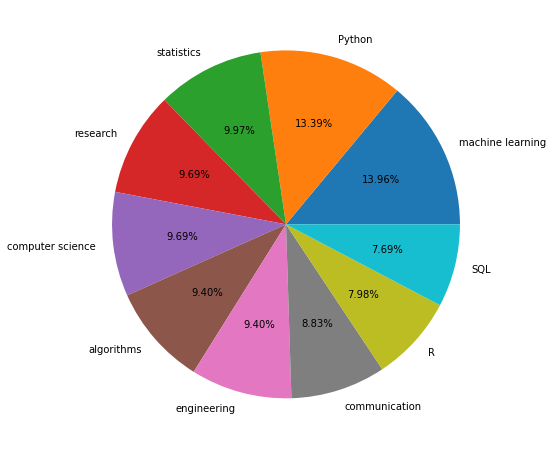

In [87]:
plt.figure(figsize=(10,8))
plt.pie(final_df.sort_values(by = 'count', ascending=False)['count'].head(10), 
        labels=final_df.sort_values(by = 'count', ascending=False)['keyword'].head(10),
        autopct='%1.2f%%')
plt.show()

In [54]:
all_jobs[all_jobs['Job title'] == 'Junior Data Scientist']

,Unnamed: 0,Job title,Company name,Company rating,Company location,is_remote,Salary range,Job summary,url,new_url,token_desc,two_tokens
11,11,Junior Data Scientist,LexisNexis Legal & Professional,4.1,"San Francisco, CA",Remote,NaN,You will prototype new ideas and build-out exi...,/rc/clk?jk=44d8b988fde236b9&fccid=06206ab329e0...,http://www.indeed.com/rc/clk?jk=44d8b988fde236...,"[knowable, market, leader, turning, contracts,...","[knowable market, market leader, leader turnin..."
21,21,Junior Data Scientist,LexisNexis Legal & Professional,4.1,"San Francisco, CA",Remote,NaN,You will prototype new ideas and build-out exi...,/rc/clk?jk=44d8b988fde236b9&fccid=06206ab329e0...,http://www.indeed.com/rc/clk?jk=44d8b988fde236...,"[knowable, market, leader, turning, contracts,...","[knowable market, market leader, leader turnin..."
52,52,Junior Data Scientist,UnitedHealth Group,3.7,"Minneapolis, MN 55406 (Longfellow area)",Remote,NaN,Undergraduate degree in applicable area of exp...,/rc/clk?jk=a7af33fe4445fd04&fccid=d3d352099834...,http://www.indeed.com/rc/clk?jk=a7af33fe4445fd...,"[work, alongside, data, scientists, engineers,...","[work alongside, alongside data, data scientis..."


In [72]:
all_jobs['token_desc'].iloc[0][0]

'advance'